# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

#### Analyis
Observed Trends
1. There is no correlation between wind speed and latitude in both the North and South Hemispheres.
2. There is a strong correlation between temperature and latitude of North and South Hemispheres.
3. There is no correlation between wind speed and cloudiness.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import random
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count
print(len(cities))


589


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
print("Beginning Data Retrieval")
print("-------------------------")
record_number = 1
city = 1
weather_check = []


url = "https://api.openweathermap.org/data/2.5/weather"

params = {"appid": weather_api_key}

for city in range(len(cities)):
    
    params["city"] = city
    
    response = requests.get(url, params = params)
    weather_check = response.json()
    
    try:
        print(f"Processing Record {city} of Set {record_number} | {cities[city]}")
        
    except(IndexError):
        print("City not found. Skipping...")
        record_number += 1
        city =+ 0
print("-------------------------")            
print("Data Retrieval Complete")
print("-------------------------")

Beginning Data Retrieval
-------------------------
Processing Record 0 of Set 1 | kruisfontein
Processing Record 1 of Set 1 | brigham city
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | avarua
Processing Record 4 of Set 1 | kendari
Processing Record 5 of Set 1 | fukumitsu
Processing Record 6 of Set 1 | lagoa
Processing Record 7 of Set 1 | kuching
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | fort nelson
Processing Record 10 of Set 1 | port alfred
Processing Record 11 of Set 1 | codrington
Processing Record 12 of Set 1 | fortuna
Processing Record 13 of Set 1 | cape town
Processing Record 14 of Set 1 | jamestown
Processing Record 15 of Set 1 | vaini
Processing Record 16 of Set 1 | lima duarte
Processing Record 17 of Set 1 | eidfjord
Processing Record 18 of Set 1 | eyl
Processing Record 19 of Set 1 | bredasdorp
Processing Record 20 of Set 1 | unye
Processing Record 21 of Set 1 | ternate
Processing Record 22 of Set 1 | faanui
Processing Record 

Processing Record 195 of Set 1 | leningradskiy
Processing Record 196 of Set 1 | tasiilaq
Processing Record 197 of Set 1 | cayenne
Processing Record 198 of Set 1 | hobbs
Processing Record 199 of Set 1 | cidreira
Processing Record 200 of Set 1 | arraial do cabo
Processing Record 201 of Set 1 | kavieng
Processing Record 202 of Set 1 | taitung
Processing Record 203 of Set 1 | paamiut
Processing Record 204 of Set 1 | nishihara
Processing Record 205 of Set 1 | norden
Processing Record 206 of Set 1 | lakes entrance
Processing Record 207 of Set 1 | mahebourg
Processing Record 208 of Set 1 | nioro
Processing Record 209 of Set 1 | lhokseumawe
Processing Record 210 of Set 1 | camana
Processing Record 211 of Set 1 | saint-georges
Processing Record 212 of Set 1 | makakilo city
Processing Record 213 of Set 1 | half moon bay
Processing Record 214 of Set 1 | andreapol
Processing Record 215 of Set 1 | saleaula
Processing Record 216 of Set 1 | hamilton
Processing Record 217 of Set 1 | havelock
Processin

Processing Record 389 of Set 1 | lavrentiya
Processing Record 390 of Set 1 | linhai
Processing Record 391 of Set 1 | tukrah
Processing Record 392 of Set 1 | rosiesti
Processing Record 393 of Set 1 | yerofey pavlovich
Processing Record 394 of Set 1 | sao gabriel
Processing Record 395 of Set 1 | morehead
Processing Record 396 of Set 1 | halifax
Processing Record 397 of Set 1 | hambantota
Processing Record 398 of Set 1 | saryshagan
Processing Record 399 of Set 1 | solnechnyy
Processing Record 400 of Set 1 | yulara
Processing Record 401 of Set 1 | north bend
Processing Record 402 of Set 1 | muscatine
Processing Record 403 of Set 1 | mount isa
Processing Record 404 of Set 1 | longyearbyen
Processing Record 405 of Set 1 | tomari
Processing Record 406 of Set 1 | artyk
Processing Record 407 of Set 1 | bandiagara
Processing Record 408 of Set 1 | yangjiang
Processing Record 409 of Set 1 | mogadishu
Processing Record 410 of Set 1 | high prairie
Processing Record 411 of Set 1 | lucea
Processing Re

Processing Record 585 of Set 1 | olga
Processing Record 586 of Set 1 | monte carmelo
Processing Record 587 of Set 1 | lidkoping
Processing Record 588 of Set 1 | rawannawi
-------------------------
Data Retrieval Complete
-------------------------


In [6]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []



for city in cities:
    query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=" + units
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    try:
        lat.append(weather_json["coord"]["lat"])
        lng.append(weather_json["coord"]["lon"])
        max_temp.append(weather_json["main"]["temp_max"])
        humidity.append(weather_json["main"]["humidity"])
        cloudiness.append(weather_json["clouds"]["all"])
        wind_speed.append(weather_json["wind"]["speed"])
        country.append(weather_json["sys"]["country"])
        date.append(weather_json["dt"])
        
        
    except(KeyError, IndexError):
        lat.append(0)
        lng.append(0)
        max_temp.append(0)
        humidity.append(0)
        cloudiness.append(0)
        wind_speed.append(0)
        country.append(0)
        date.append(0)

In [7]:
weather_dict = {
    "City" : cities, 
    "Lat" : lat,
    "Lng" : lng,
    "Max Temp" : max_temp,
    "Humidity" : humidity,
    "Cloudiness" : cloudiness,
    "Wind Speed" : wind_speed,
    "Country" : country,
    "Date" : date
}

weather_city_df_api = pd.DataFrame(weather_dict)

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
#Saving the dataframe
weather_city_df_api.to_csv("../WeatherPy/CityWeatherData.csv", index=False, header=True)

#Preview the dataframe
weather_city_df_api.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kruisfontein,-34.0033,24.7314,58.44,71,6,6.91,ZA,1651800879
1,brigham city,41.5102,-112.0155,72.86,26,0,7.00,US,1651800879
2,mataura,-46.1927,168.8643,64.24,61,100,2.30,NZ,1651800880
3,avarua,-21.2078,-159.7750,82.45,69,20,6.91,CK,1651800880
4,kendari,-3.9450,122.4989,86.27,68,16,1.66,ID,1651800881


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
#There are no cities with humidity > 100%
humidity_df = weather_city_df_api.loc[weather_city_df_api["Humidity"] > 100, :]
humidity_df


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [7]:
#  Get the indices of cities that have humidity over 100%.
#Do not have any cities with humidity over 100, so skipping these steps

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs in the output_data folder
* Below are examples of what you should get but your results will be different.

## Latitude vs. Temperature Plot

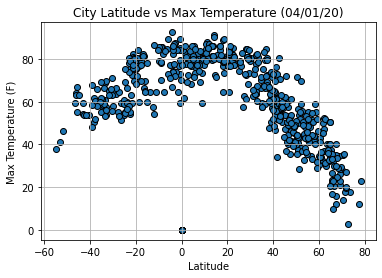

In [10]:
plt.scatter(weather_city_df_api['Lat'],weather_city_df_api['Max Temp'], marker='o',edgecolor="black")
plt.title("City Latitude vs Max Temperature (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)
plt.savefig("../WeatherPy/Images/MaxTempCityLatitude.png")
plt.show()

## Latitude vs. Humidity Plot

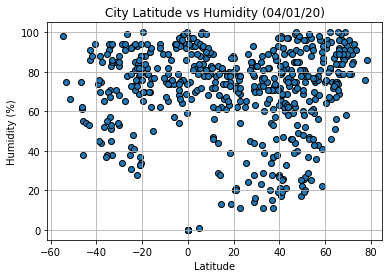

In [11]:
plt.scatter(weather_city_df_api['Lat'],weather_city_df_api['Humidity'], marker='o',edgecolor="black")
plt.title("City Latitude vs Humidity (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.savefig("../WeatherPy/Images/HumidityCityLatitude.png")
plt.show()

## Latitude vs. Cloudiness Plot

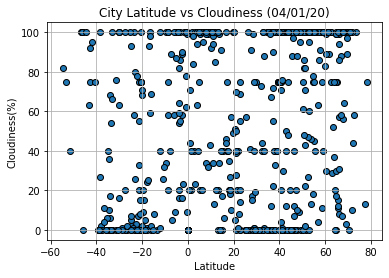

In [12]:
plt.scatter(weather_city_df_api['Lat'],weather_city_df_api['Cloudiness'], marker='o',edgecolor="black")
plt.title("City Latitude vs Cloudiness (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.grid(True)
plt.savefig("../WeatherPy/Images/CloudinessCityLatitude.png")
plt.show()

## Latitude vs. Wind Speed Plot

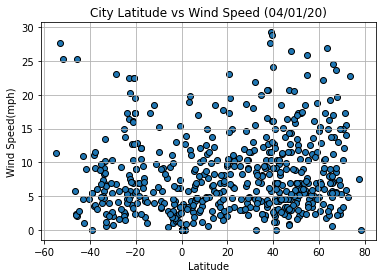

In [13]:
plt.scatter(weather_city_df_api['Lat'],weather_city_df_api['Wind Speed'], marker='o',edgecolor="black")
plt.title("City Latitude vs Wind Speed (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.grid(True)
plt.savefig("../WeatherPy/Images/WindspeedCityLatitude.png")
plt.show()

## Linear Regression

In [15]:
northern_hemp= weather_city_df_api.loc[weather_city_df_api["Lat"]>0, :]
southern_hemp= weather_city_df_api.loc[weather_city_df_api["Lat"]<0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

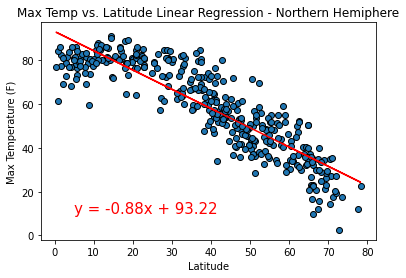

The rvalue is 0.77390076309149.


In [17]:
x_values = northern_hemp["Lat"]
y_values = northern_hemp["Max Temp"]

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x_values, y_values, marker = "o", edgecolor = "black")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(5,10), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Max Temp vs. Latitude Linear Regression - Northern Hemiphere")
plt.savefig("../WeatherPy/Images/MaxTempRegressionofNorthHemp.png")
plt.show()

print(f"The rvalue is {rvalue ** 2}.")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

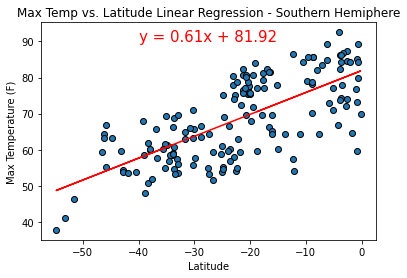

The rvalue is 0.5000183611209329.


In [20]:
x_values = southern_hemp["Lat"]
y_values = southern_hemp["Max Temp"]

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x_values, y_values, marker = "o", edgecolor = "black")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(-40,90), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Max Temp vs. Latitude Linear Regression - Southern Hemiphere")
plt.savefig("../WeatherPy/Images/MaxTempRegressionofSouthHemp.png")
plt.show()

print(f"The rvalue is {rvalue ** 2}.")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

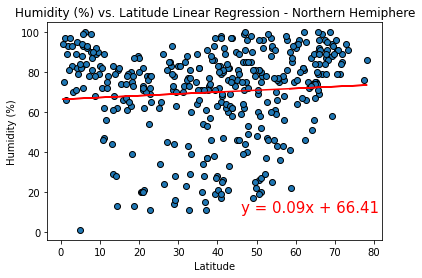

The rvalue is 0.006486416489339716.


In [30]:
x_values = northern_hemp["Lat"]
y_values = northern_hemp["Humidity"]

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x_values, y_values, marker = "o", edgecolor = "black")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(46,10), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Humidity (%) vs. Latitude Linear Regression - Northern Hemiphere")
plt.savefig("../WeatherPy/Images/HumidityRegressionofNorthHemp.png")
plt.show()

print(f"The rvalue is {rvalue ** 2}.")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

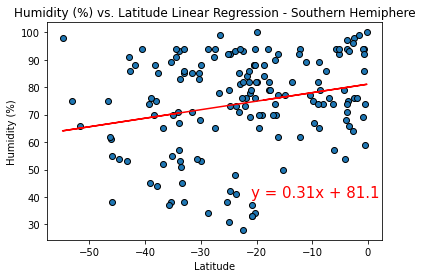

The rvalue is 0.053999980787561574.


In [36]:
x_values = southern_hemp["Lat"]
y_values = southern_hemp["Humidity"]

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x_values, y_values, marker = "o", edgecolor = "black")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(-21,40), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Humidity (%) vs. Latitude Linear Regression - Southern Hemiphere")
plt.savefig("../WeatherPy/Images/HumidityRegressionofSouthHemp.png")
plt.show()

print(f"The rvalue is {rvalue ** 2}.")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

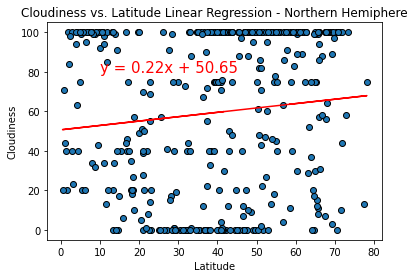

The rvalue is 0.012044114558280736.


In [41]:
x_values = northern_hemp["Lat"]
y_values = northern_hemp["Cloudiness"]

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x_values, y_values, marker = "o", edgecolor = "black")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(10,80), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Cloudiness vs. Latitude Linear Regression - Northern Hemiphere")
plt.savefig("../WeatherPy/Images/HumidityRegressionofNorthHemp.png")
plt.show()

print(f"The rvalue is {rvalue ** 2}.")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

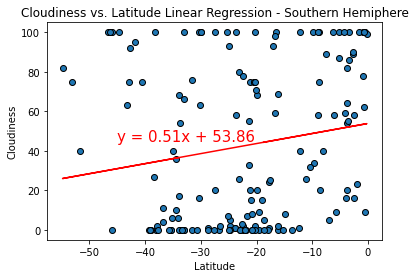

The rvalue is 0.02844127408746725.


In [47]:
x_values = southern_hemp["Lat"]
y_values = southern_hemp["Cloudiness"]

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x_values, y_values, marker = "o", edgecolor = "black")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(-45,45), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Cloudiness vs. Latitude Linear Regression - Southern Hemiphere")
plt.savefig("../WeatherPy/Images/HumidityRegressionofSouthHemp.png")
plt.show()

print(f"The rvalue is {rvalue ** 2}.")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

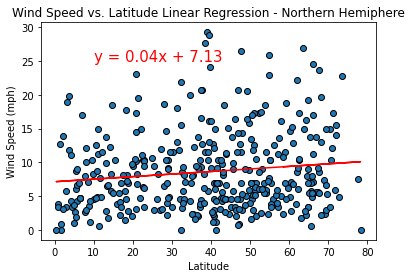

The rvalue is 0.01695065499050935.


In [51]:
x_values = northern_hemp["Lat"]
y_values = northern_hemp["Wind Speed"]

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x_values, y_values, marker = "o", edgecolor = "black")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(10,25), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Wind Speed vs. Latitude Linear Regression - Northern Hemiphere")
plt.savefig("../WeatherPy/Images/WindSpeedRegressionofNorthHemp.png")
plt.show()

print(f"The rvalue is {rvalue ** 2}.")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

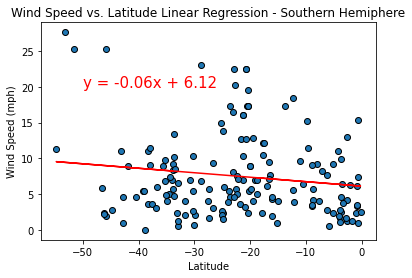

The rvalue is 0.02075339296097903.


In [54]:
x_values = southern_hemp["Lat"]
y_values = southern_hemp["Wind Speed"]

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x_values, y_values, marker = "o", edgecolor = "black")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(-50,20), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Wind Speed vs. Latitude Linear Regression - Southern Hemiphere")
plt.savefig("../WeatherPy/Images/WindSpeedRegressionofSouthHemp.png")
plt.show()

print(f"The rvalue is {rvalue ** 2}.")